# Part1 : Data wrangling

## Data Download and pre-processing

In [3]:
import requests
from robobrowser import RoboBrowser
from bs4 import BeautifulSoup
import re
from lxml import html
import config
config.form['accept']
config.form['password']

In [1]:
import pathlib
import zipfile
from io import BytesIO
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import glob
import numpy as np
from sklearn.metrics import *
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import sklearn
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import statsmodels.api as sm
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn import preprocessing
from math import sqrt

C:\Users\Girijesh\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
mean_squared_error

<function sklearn.metrics.regression.mean_squared_error>

In [2]:
filepath = './zipfile'
#creating the folder for zipfiles
pathlib.Path(filepath).mkdir(parents=True, exist_ok=True) 

#account parameters
username = config.form['username']
password = config.form['password']

#Intializing browser
br = RoboBrowser()
#open website
br.open('https://freddiemac.embs.com/FLoan/secure/login.php?pagename=download')  

#Getting form from browser
form = br.get_form()
form['username'] = username
form['password'] = password
br.submit_form(form)

#accept the form
form = br.get_form()
form['accept'] = config.form['accept']
form['action'] = 'acceptTandC'
form['acceptSubmit'] = 'Continue'
br.submit_form(form)
links = br.find_all('a')
br.session.cookies

In [15]:
cookie = br.session.cookies.get_dict()
cookie

{'PHPSESSID': 'e48ht0e515etiho4r1g8bmhip2'}

In [161]:
for link in links:
    regex = re.findall('sample_\d+.zip', str(link))
    if(regex and (int)(re.findall('\d+', str(regex))[0]) > 2005):
        url = "https://freddiemac.embs.com/FLoan/Data/" + link.get('href')
        print(url)
        year = regex[0].split('_')[1][:4]
        print(year)
        content = requests.get(url, cookies = cookie) 
        zf = zipfile.ZipFile(BytesIO(content.content))
        
        #Getting txt files from the zipfiles
        for name in zf.namelist():
            
            #Reading each files
            df = pd.read_csv(zf.open(name), sep= '|', header = None)
            
            if name.split('_')[1] == 'orig':
                #Converting into csv each year
                df.to_csv(filepath + '/' + str(name.split('.')[0]) + '.csv', mode = 'a', index= False, header = None)
            else:
                df.to_csv(filepath + '/' + str(name.split('.')[0]) + '.csv', mode = 'a', index= False, header = None)

https://freddiemac.embs.com/FLoan/Data/download.php?f=sample_2006&s=33286483
2006
https://freddiemac.embs.com/FLoan/Data/download.php?f=sample_2007&s=31029360
2007
https://freddiemac.embs.com/FLoan/Data/download.php?f=sample_2008&s=25243310
2008
https://freddiemac.embs.com/FLoan/Data/download.php?f=sample_2009&s=29742643
2009
https://freddiemac.embs.com/FLoan/Data/download.php?f=sample_2010&s=29502562
2010
https://freddiemac.embs.com/FLoan/Data/download.php?f=sample_2011&s=27895583
2011
https://freddiemac.embs.com/FLoan/Data/download.php?f=sample_2012&s=31533051
2012
https://freddiemac.embs.com/FLoan/Data/download.php?f=sample_2013&s=26626765
2013
https://freddiemac.embs.com/FLoan/Data/download.php?f=sample_2014&s=20459253
2014
https://freddiemac.embs.com/FLoan/Data/download.php?f=sample_2015&s=17376778
2015
https://freddiemac.embs.com/FLoan/Data/download.php?f=sample_2016&s=12007433
2016
https://freddiemac.embs.com/FLoan/Data/download.php?f=sample_2017&s=4621125
2017


# Summary

In [24]:
filepath = './zipfile'
allfiles = glob.glob(filepath + "/*.csv")
n_filepath = './summaryfiles'
#creating the folder for zipfiles
pathlib.Path(n_filepath).mkdir(parents=True, exist_ok=True) 

# print(allfiles)
dfs_origin = []
dfs_performance = []
for files in allfiles:
    print(files)
    if files.split('_')[1] == 'orig':
        print(files.split('_')[1])
        origin_files = pd.read_csv(files ,header = None, index_col= None)
        origin_files.drop(origin_files.columns[25], axis= 1, inplace = True)
        origin_files.columns = ['CREDIT SCORE', 'FIRST PAYMENT DATE', 'FIRST TIME HOMEBUYER FLAG', 'MATURITY DATE', 'MSA', 
              'MORTGAGE INSURANCE PERCENTAGE', 'NUMBER OF UNITS', 'OCCUPANCY STATUS', 'ORIGINAL COMBINED LOAN-TO-VALUE',
             'ORIGINAL DEBT-TO-INCOME (DTI) RATIO', 'ORIGINAL UPB', 'ORIGINAL LOAN-TO-VALUE (LTV)', 
             'ORIGINAL INTEREST RATE', 'CHANNEL', 'PREPAYMENT PENALTY MORTGAGE (PPM) FLAG', 'PRODUCT TYPE', 
                    'PROPERTY STATE', 'PROPERTY TYPE', 'POSTAL CODE', 'LOAN SEQUENCE NUMBER', 'LOAN PURPOSE', 
                    'ORIGINAL LOAN TERM', 'NUMBER OF BORROWERS', 'SELLER NAME', 'SERVICER NAME']
#         origin_files = origin_files.dropna(subset = ['MSA', 'PREPAYMENT PNALTY MORTGAGE (PPM) FLAG'], axis=1)
        summmary_files= origin_files.describe()
        summmary_files.to_csv(n_filepath + "/summary_"+ str(files.split('\\')[1])) 
        dfs_origin.append(origin_files)
    
    elif files.split('_')[1] == 'svcg':
        print(files.split('_')[1])
        performance_files = pd.read_csv(files ,header = None, index_col= None)
        performance_files.columns = ['LOAN SEQUENCE NUMBER', 'MONTHLY REPORTING PERIOD', 'CURRENT ACTUAL UPB', 
                                     'CURRENT LOAN DELINQUENCY STATUS', 'LOAN AGE', 'REMAINING MONTHS TO LEGAL MATURITY', 
                                     'REPURCHASE FLAG', 'MODIFICATION FLAG', 'ZERO BALANCE CODE','ZERO BALANCE EFFECTIVE DATE',
                                     'CURRENT INTEREST RATE', 'CURRENT DEFERRED UPB', 'DUE DATE OF LAST PAID INSTALLMENT (DDLPI)',
                                     'MI RECOVERIES', 'NET SALES PROCEEDS', 'NON MI RECOVERIES', 'EXPENSES', 'LEGAL COSTS', 
                                     'MAINTENANCE AND PRESERVATION COSTS', 'TAXES AND INSURANCE', 'MISCELLANEOUS EXPENSES', 
                                     'ACTUAL LOSS CALCULATION', 'MODIFICATION COST', 'STEP MODIFICATION FLAG', 'DEFERRED PAYMENT MODIFICATION',
                                     'ESTIMATED LOAN TO VALUE (ELTV)']
#         performance_files = performance_files.dropna(axis=0, how='any')
        summary_perf = performance_files.describe()
        summary_perf.to_csv(n_filepath + "/summary" + str(files.split('\\')[1]))
        dfs_performance.append(performance_files)
                     
    else:
        pass


./zipfile\sample_orig_2006.csv
orig
./zipfile\sample_orig_2007.csv
orig
./zipfile\sample_orig_2008.csv
orig
./zipfile\sample_orig_2009.csv
orig
./zipfile\sample_orig_2010.csv
orig
./zipfile\sample_orig_2011.csv
orig
./zipfile\sample_orig_2012.csv
orig
./zipfile\sample_orig_2013.csv
orig
./zipfile\sample_orig_2014.csv
orig
./zipfile\sample_orig_2015.csv
orig
./zipfile\sample_orig_2016.csv
orig
./zipfile\sample_orig_2017.csv
orig
./zipfile\sample_svcg_2006.csv
svcg
./zipfile\sample_svcg_2007.csv
svcg
./zipfile\sample_svcg_2008.csv
svcg
./zipfile\sample_svcg_2009.csv
svcg
./zipfile\sample_svcg_2010.csv
svcg
./zipfile\sample_svcg_2011.csv
svcg
./zipfile\sample_svcg_2012.csv
svcg
./zipfile\sample_svcg_2013.csv
svcg
./zipfile\sample_svcg_2014.csv
svcg
./zipfile\sample_svcg_2015.csv
svcg
./zipfile\sample_svcg_2016.csv
svcg
./zipfile\sample_svcg_2017.csv
svcg


# Part II: Building and evaluating models.

In [4]:
dfs_origin[0]

,CREDIT SCORE,FIRST PAYMENT DATE,FIRST TIME HOMEBUYER FLAG,MATURITY DATE,MSA,MORTGAGE INSURANCE PERCENTAGE,NUMBER OF UNITS,OCCUPANCY STATUS,ORIGINAL COMBINED LOAN-TO-VALUE,ORIGINAL DEBT-TO-INCOME (DTI) RATIO,...,PRODUCT TYPE,PROPERTY STATE,PROPERTY TYPE,POSTAL CODE,LOAN SEQUENCE NUMBER,LOAN PURPOSE,ORIGINAL LOAN TERM,NUMBER OF BORROWERS,SELLER NAME,SERVICER NAME
0,790,200603,N,203602,NaN,0,1,P,80,27,...,FRM,KY,SF,40300,F106Q1000086,C,360,2,Other sellers,USBANKNA
1,755,200603,N,203602,NaN,30,1,P,95,52,...,FRM,OK,SF,74500,F106Q1000096,P,360,2,Other sellers,Other servicers
2,660,200603,9,203602,28740.0,0,1,P,37,40,...,FRM,NY,SF,12500,F106Q1000105,C,360,1,Other sellers,Other servicers
3,714,200603,N,203602,45820.0,0,1,P,64,23,...,FRM,KS,SF,66400,F106Q1000192,P,360,1,Other sellers,Other servicers
4,687,200603,N,203602,NaN,0,1,P,61,46,...,FRM,NC,SF,27200,F106Q1000240,C,360,1,Other sellers,USBANKNA
5,738,200603,N,203602,37964.0,0,1,P,78,41,...,FRM,PA,SF,19100,F106Q1000259,C,360,1,Other sellers,USBANKNA
6,610,200603,N,203602,48300.0,0,1,P,65,25,...,FRM,WA,SF,98800,F106Q1000288,C,360,1,Other sellers,Other servicers
7,799,200603,Y,203602,25420.0,0,1,P,80,45,...,FRM,PA,SF,17000,F106Q1000336,P,360,1,Other sellers,Other servicers
8,770,200603,N,203602,NaN,0,1,P,59,26,...,FRM,IN,SF,47500,F106Q1000345,C,360,2,Other sellers,Other servicers
9,780,200603,N,203602,16020.0,0,1,P,80,40,...,FRM,MO,SF,63700,F106Q1000355,N,360,2,Other sellers,USBANKNA


# Data Filtering Function

In [5]:
#Dropping the rows where mortgage property doesnot falls in MSA or Metroplitan division and PPM is not missing
# Selecting the year:
def data_year(dataframe):
    
    """ Data filtering with Year and Quarters"""
    
    year = input("Enter the year :")
    year_dict = {'2006': 0, '2007': 1, '2008' : 2, '2009' : 3, '2010' : 4, '2011': 5, '2012': 6, '2013': 7, '2014': 8, '2015': 9, '2016' : 10, '2017' : 11}
    fin_year = year_dict[str(year)]
    
    #Making a copy of original dataframe
    cat_df = dataframe[fin_year]
    
    ## Dropping the Null values
    cat_df.dropna(subset = ['MSA', 'PREPAYMENT PNALTY MORTGAGE (PPM) FLAG'], inplace = True)

    #Getting the loan Sequency Number columns
    LSN = cat_df['LOAN SEQUENCE NUMBER']

    #Dropping the columns with datetime attribute:
    #1. 'FIRST PAYMENT DATE', 'MATURITY DATE', 'LOAN SEQUENCE NUMBER'
    cat_df_1 = cat_df.drop(['FIRST PAYMENT DATE', 'MATURITY DATE', 'LOAN SEQUENCE NUMBER' ], axis= 1)

    #Convert int64 nto 'category':
    #1. NUMBER OF UNITS', NUMBER OF BORROWERS' i
    for col in ['NUMBER OF UNITS', 'NUMBER OF BORROWERS']:
        cat_df_1[col] = cat_df_1[col].astype('category')

    #Convert the object into category type
    cat_df_1[cat_df_1.select_dtypes(['object']).columns] = cat_df_1.select_dtypes(['object']).apply(lambda x: x.astype('category'))

    # create dummies:
    categorical_ = cat_df_1.select_dtypes(['category']).columns

    # Create dummy vriables:
    cat_df_origin_dummy = pd.get_dummies(cat_df_1)

    #Normalize the dataframe, mean = 0, variance = 1: **
    norm_array_origin = preprocessing.StandardScaler().fit_transform(cat_df_origin_dummy)
    col = cat_df_origin_dummy.columns
    norm_df_origin = pd.DataFrame(norm_array_origin, columns= col )
    norm_df_origin["LOAN SEQUENCE NUMBER"] = LSN
    
    #Getting the Quarters, predictors split:
    quarter = input("Enter the quarter Q1 or Q2 or Q3 or Q4:")
    query = "F1" + year[2:] + quarter 
    Q_cat = norm_df_origin[norm_df_origin["LOAN SEQUENCE NUMBER"].str.contains(query, na = False)]
    Q1 = Q_cat.drop('LOAN SEQUENCE NUMBER', axis =1 )
    
    #Information of the variables
    Q1_y = Q1[["ORIGINAL INTEREST RATE"]]
    Q1_x = Q1.drop(['ORIGINAL INTEREST RATE'], axis= 1)
    return Q1, Q1_x, Q1_y

# Forward Feature Selection: [Training data]

# Data Preparation for Variables Selection

In [7]:
#Choosing the Quater for the data 2006, Q1
Q1, Q1_x, Q1_y = data_year(dfs_origin)
print("The shape of training set :" +  str(Q1_x.shape))
print("The shape of target set : " + str(Q1_y.shape))
print("The shape of original dataframe with integer variables:" + str(Q1.shape))

Enter the year :2006
Enter the quarter Q1 or Q2 or Q3 or Q4:Q1
The shape of training set :(10465, 126)
The shape of target set : (10465, 1)
The shape of original dataframe with integer variables:(10465, 127)


# Sequential Forward Selection

In [31]:
#Forward Feature Selection
lr = LinearRegression()
sfs=SFS(lr,
        k_features= 30,
        forward=True, 
        floating=False,
        n_jobs=-1,
        verbose=2,
        scoring='neg_mean_squared_error',
        cv=10)
sfs=sfs.fit(Q1_x,Q1_y)

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:   20.3s finished

[2018-11-28 23:45:54] Features: 1/30 -- score: -0.7197712243874288[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    9.6s finished

[2018-11-28 23:46:04] Features: 2/30 -- score: -0.687075712637388[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 124 out of 124 | elapsed:    9.2s finished

[2018-11-28 23:46:13] Features: 3/30 -- score: -0.66311563046321[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 123 out of 123 | elapsed:   10.2s finished

[2018-11-28 23:46:24] Features: 4/30 -- score: -0.6476271502769074[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 122 out of 122 | elapsed:   10.6s finished

[2018-11-28 23:46:35] Features: 5/30 -- score: -0.6385446122355833[Pa

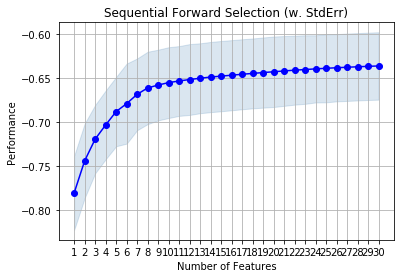

In [41]:
#Featrure Plot
plot_sfs(sfs.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [20]:
#feature names
fw_f_names = sfs.k_feature_names_

In [21]:
#feature indexes
fw_features_ind = sfs.k_feature_idx_

## Number of features
sfs.k_feature_names_

In [16]:
#No of features
sfs.k_features

30

# Sequential Backward Selection

In [14]:
#Backward feature selection
lr = LinearRegression()
sbs=SFS(lr,
        k_features= 30,
        forward=False, 
        floating=False,
        n_jobs=-1,
        verbose=2,
        scoring='neg_mean_squared_error',
        cv=10)
sbs=sbs.fit(Q1_x.values,Q1_y.values)

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:  1.3min finished

[2018-11-28 21:50:07] Features: 125/30 -- score: -3.0575704726992107e+22[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:  1.3min finished

[2018-11-28 21:51:23] Features: 124/30 -- score: -2.3450336902568827e+22[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done 124 out of 124 | elapsed:  1.3min finished

[2018-11-28 21:52:43] Features: 123/30 -- score: -2.3164546215782226e+22[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done 123 out of 123 | elapsed:  1.3min finished

[2018-11-28 21:54:02] Features: 122/30 -- score: -2.6237501599129688e+22[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done 122 out of 122 | elapsed:  1.3min finished

[2018-11-28 21:55:18] Features: 121/30 -- 

[2018-11-28 22:26:23] Features: 85/30 -- score: -0.5963280154970011[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:   31.9s finished

[2018-11-28 22:26:55] Features: 84/30 -- score: -0.5961764302103969[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:   30.5s finished

[2018-11-28 22:27:26] Features: 83/30 -- score: -0.5960449907026361[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done  83 out of  83 | elapsed:   30.1s finished

[2018-11-28 22:27:56] Features: 82/30 -- score: -0.5955418813514737[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done  82 out of  82 | elapsed:   29.3s finished

[2018-11-28 22:28:26] Features: 81/30 -- score: -0.595882286284888[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   28.7s finish

[2018-11-28 22:40:42] Features: 44/30 -- score: -0.5961485131286492[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:    9.0s finished

[2018-11-28 22:40:52] Features: 43/30 -- score: -0.5953322405917602[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:    9.4s finished

[2018-11-28 22:41:01] Features: 42/30 -- score: -0.5961325908413391[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    8.6s finished

[2018-11-28 22:41:10] Features: 41/30 -- score: -0.5954955352494892[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    8.0s finished

[2018-11-28 22:41:19] Features: 40/30 -- score: -0.5955331184535926[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    8.4s finis

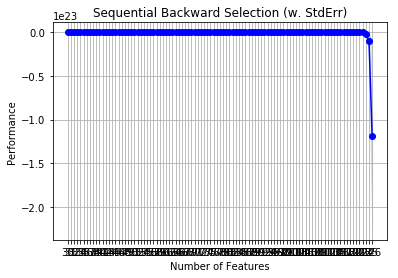

In [42]:
#Feature Plot

fig = plot_sfs(sbs.get_metric_dict(), kind='std_err')
plt.title('Sequential Backward Selection (w. StdErr)')
plt.grid()
plt.show()

In [70]:
#Index of features
bk_ind = sbs.k_feature_idx_

int

In [97]:
#Feature names:
bk_ind = list(bk_ind)
feature_name_bk = []
for i in bk_ind:
    feature_name_bk.append(Q1_x.columns[i])

In [98]:
#no. of features
sbs.k_features

30

# Exhaustive Feature

In [133]:
#Model
lr = LinearRegression()
efs = EFS(lr, 
          min_features=25,
          max_features= 37,
          scoring= 'neg_mean_squared_error',
          n_jobs=-1,
          print_progress=True,
          cv=10)
efs.fit(Q1_x,Q1_y)

In [37]:
efs.best_feature_names_

('CREDIT SCORE',
 'MSA',
 'MORTGAGE INSURANCE PERCENTAGE',
 'ORIGINAL COMBINED LOAN-TO-VALUE',
 'ORIGINAL UPB',
 'POSTAL CODE',
 'ORIGINAL LOAN TERM')

In [38]:
efs.best_score_

-0.94335523987306169

In [39]:
efs.best_idx_

(0, 1, 2, 3, 5, 7, 8)

In [12]:
# Validatatio Q2 quater:
Q2, Q2_x, Q2_y = data_Quater(norm_df_origin)

Enter the quarter Q1 or Q2 or Q3 or Q4:Q2


# STEPWISE :

In [27]:
def stepwise_selection(X, y):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    
    initial_list=[] 
    threshold_in=0.01 
    threshold_out = 0.05 
    verbose=True
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [28]:
step_feature_names = stepwise_selection(Q1_x, Q1_y)

Add  SERVICER NAME_FLAGSTARCAPITALMARKE with p-value 0.0
Add  ORIGINAL LOAN TERM             with p-value 1.00035e-267
Add  SELLER NAME_GMACMORTGAGE,LLC   with p-value 0.0
Add  ORIGINAL UPB                   with p-value 1.06321e-110
Add  OCCUPANCY STATUS_I             with p-value 6.99069e-86
Drop SELLER NAME_GMACMORTGAGE,LLC   with p-value 0.750085
Add  SERVICER NAME_PROVIDENTFUNDINGASSO with p-value 0.0
Add  SELLER NAME_GMACMORTGAGE,LLC   with p-value 0.0
Add  MORTGAGE INSURANCE PERCENTAGE  with p-value 1.35822e-57
Add  LOAN PURPOSE_P                 with p-value 1.81326e-39
Add  SERVICER NAME_BANKOFAMERICA,NA with p-value 4.36766e-28
Drop SERVICER NAME_PROVIDENTFUNDINGASSO with p-value 0.699482
Add  PROPERTY TYPE_MH               with p-value 8.99843e-23
Drop SELLER NAME_GMACMORTGAGE,LLC   with p-value 0.705956
Add  SERVICER NAME_PROVIDENTFUNDINGASSO with p-value 0.0
Add  SELLER NAME_GMACMORTGAGE,LLC   with p-value 0.0
Add  CHANNEL_T                      with p-value 2.19323e-22
Ad

In [46]:
print("Stepwise Variables selection: " + "\n" +str(step_feature_names))
print("Total Number of Variables: " + str(len(step_feature_names)))

Stepwise Variables selection: 
['SERVICER NAME_FLAGSTARCAPITALMARKE', 'ORIGINAL LOAN TERM', 'ORIGINAL UPB', 'OCCUPANCY STATUS_I', 'MORTGAGE INSURANCE PERCENTAGE', 'LOAN PURPOSE_P', 'SERVICER NAME_BANKOFAMERICA,NA', 'PROPERTY TYPE_MH', 'CHANNEL_T', 'SERVICER NAME_WELLSFARGOBANK,NA', 'ORIGINAL COMBINED LOAN-TO-VALUE', 'PROPERTY STATE_MI', 'SELLER NAME_CITIMORTGAGE,INC', 'SELLER NAME_CHASEHOMEFINANCELLC', 'PROPERTY STATE_FL', 'SELLER NAME_BANKOFAMERICA,NA', 'PROPERTY STATE_IL', 'SERVICER NAME_COUNTRYWIDE', 'SELLER NAME_Other sellers', 'SELLER NAME_USBANKNA', 'PROPERTY STATE_NC', 'LOAN PURPOSE_C', 'PROPERTY STATE_NJ', 'PROPERTY STATE_AR', 'PROPERTY STATE_HI', 'SERVICER NAME_TAYLOR,BEAN&WHITAKER', 'PROPERTY STATE_SD', 'PROPERTY STATE_AZ', 'CREDIT SCORE', 'SELLER NAME_FLAGSTARCAPITALMARKE', 'CHANNEL_C', 'PROPERTY STATE_OH', 'PROPERTY STATE_WI', 'OCCUPANCY STATUS_P', 'FIRST TIME HOMEBUYER FLAG_N', 'PROPERTY STATE_MT', 'SELLER NAME_GMACMORTGAGE,LLC']
Total Number of Variables: 37


In [65]:
#Index Features
stepwise_index_features = [Q1_x.columns.get_loc(c) for c in step_feature_names]

In [135]:
final_features = set(step_feature_names).intersection(set(feature_name_bk)).intersection(set(fw_f_names))
print(final_features)

{'PROPERTY TYPE_MH', 'PROPERTY STATE_AR', 'ORIGINAL UPB', 'ORIGINAL LOAN TERM', 'LOAN PURPOSE_P', 'OCCUPANCY STATUS_P', 'SELLER NAME_BANKOFAMERICA,NA', 'MORTGAGE INSURANCE PERCENTAGE', 'FIRST TIME HOMEBUYER FLAG_N', 'PROPERTY STATE_NC', 'ORIGINAL COMBINED LOAN-TO-VALUE'}


# Feature Selection [Testing data]:

In [9]:
Q2, Q2_x, Q2_y = data_year(dfs_origin)

Enter the year :2006
Enter the quarter Q1 or Q2 or Q3 or Q4:Q2


# Forward

In [106]:
#Forward
lr = LinearRegression()
sfs=SFS(lr,
        k_features= 30,
        forward=True, 
        floating=False,
        n_jobs=-1,
        verbose=2,
        scoring='neg_mean_squared_error',
        cv=10)
sfs_valid=sfs.fit(Q2_x,Q2_y)

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:   13.7s finished

[2018-11-29 07:50:47] Features: 1/30 -- score: -0.7805275210546906[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   12.1s finished

[2018-11-29 07:50:59] Features: 2/30 -- score: -0.7439891965564635[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 124 out of 124 | elapsed:    9.6s finished

[2018-11-29 07:51:09] Features: 3/30 -- score: -0.7193049918769181[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 123 out of 123 | elapsed:   10.1s finished

[2018-11-29 07:51:20] Features: 4/30 -- score: -0.7031315733015101[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 122 out of 122 | elapsed:    9.0s finished

[2018-11-29 07:51:29] Features: 5/30 -- score: -0.6879095115261846

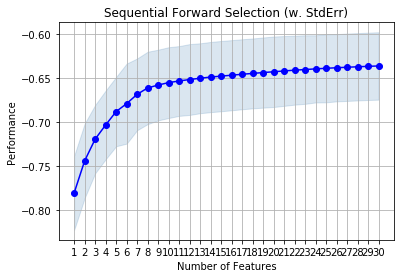

In [107]:
#Plot 

fig = plot_sfs(sfs_valid.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [110]:
#Feature Names:

fw_valid_features = sfs_valid.k_feature_names_

# Backward

In [111]:
#Model

lr = LinearRegression()
sbs=SFS(lr,
        k_features= 30,
        forward=False, 
        floating=False,
        n_jobs=-1,
        verbose=2,
        scoring='neg_mean_squared_error',
        cv=10)
sbs_valid=sbs.fit(Q2_x.values,Q2_y.values)

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:  1.2min finished

[2018-11-29 08:01:56] Features: 125/30 -- score: -3.6618738554632336e+22[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:  1.6min finished

[2018-11-29 08:03:33] Features: 124/30 -- score: -5.181471781795399e+21[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   31.4s
[Parallel(n_jobs=-1)]: Done 124 out of 124 | elapsed:  1.8min finished

[2018-11-29 08:05:23] Features: 123/30 -- score: -7.752290526364176e+20[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   32.2s
[Parallel(n_jobs=-1)]: Done 123 out of 123 | elapsed:  1.7min finished

[2018-11-29 08:07:04] Features: 122/30 -- score: -1.2655186158563618e+21[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 122 out of 122 | elapsed:  1.5min finished

[2018-11-29 08:08:33] Features: 121/30 -- sc


[2018-11-29 08:43:30] Features: 85/30 -- score: -0.638444682658921[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:   32.9s finished

[2018-11-29 08:44:04] Features: 84/30 -- score: -0.6381911078493283[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:   43.7s finished

[2018-11-29 08:44:48] Features: 83/30 -- score: -0.636286072391175[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done  83 out of  83 | elapsed:   38.0s finished

[2018-11-29 08:45:26] Features: 82/30 -- score: -0.6369587404956463[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done  82 out of  82 | elapsed:   29.9s finished

[2018-11-29 08:45:56] Features: 81/30 -- score: -0.6390657581025565[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   29.4s finish


[2018-11-29 08:57:04] Features: 44/30 -- score: -0.6570631248634877[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:    8.6s finished

[2018-11-29 08:57:13] Features: 43/30 -- score: -0.6552780851673885[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:    8.1s finished

[2018-11-29 08:57:21] Features: 42/30 -- score: -0.6524630078310523[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    7.9s finished

[2018-11-29 08:57:29] Features: 41/30 -- score: -0.6578397240401019[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    7.4s finished

[2018-11-29 08:57:37] Features: 40/30 -- score: -0.6594561336173612[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    7.4s fini

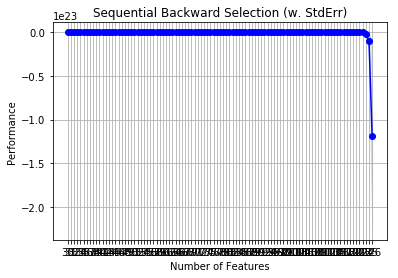

In [44]:
#Plot

fig = plot_sfs(sbs_valid.get_metric_dict(), kind='std_err')
plt.title('Sequential Backward Selection (w. StdErr)')
plt.grid()
plt.show()

In [112]:
#feature names:
bk_features_valid = sbs_valid.k_feature_idx_

In [114]:
#no. of features:
no_features_valid = sbs_valid.k_feature_idx_

In [122]:
#Feature Names

bk_features_valid_1 = list(bk_features_valid)
stepwise_valid = []
for index in bk_features_valid_1:
    stepwise_valid.append(Q2_x.columns[index])
print("The feaures for backward regression in valid set Q2:  " + "\n" + str(stepwise_valid))
print("The no. of features are: " + str(len(stepwise_valid)))

The feaures for backward regression in valid set Q2:  
['MORTGAGE INSURANCE PERCENTAGE', 'ORIGINAL COMBINED LOAN-TO-VALUE', 'ORIGINAL UPB', 'ORIGINAL LOAN-TO-VALUE (LTV)', 'ORIGINAL LOAN TERM', 'FIRST TIME HOMEBUYER FLAG_Y', 'NUMBER OF UNITS_1', 'NUMBER OF UNITS_2', 'OCCUPANCY STATUS_I', 'OCCUPANCY STATUS_S', 'CHANNEL_C', 'PREPAYMENT PENALTY MORTGAGE (PPM) FLAG_N', 'PROPERTY STATE_AL', 'PROPERTY STATE_AZ', 'PROPERTY STATE_FL', 'PROPERTY STATE_KY', 'PROPERTY STATE_LA', 'PROPERTY STATE_MA', 'PROPERTY STATE_ME', 'PROPERTY STATE_MN', 'PROPERTY STATE_NC', 'PROPERTY STATE_ND', 'PROPERTY STATE_OK', 'PROPERTY STATE_PR', 'PROPERTY STATE_TX', 'PROPERTY STATE_UT', 'LOAN PURPOSE_C', 'LOAN PURPOSE_N', 'LOAN PURPOSE_P', 'SELLER NAME_FLAGSTARBANK,FSB']
The no. of features are: 30


# Stepwise 

In [105]:
stepwise_feat_valid = stepwise_selection(Q2_x, Q2_y)

Add  SELLER NAME_FLAGSTARBANK,FSB   with p-value 0.0
Add  ORIGINAL LOAN TERM             with p-value 1.77394e-227
Add  SELLER NAME_NATLCITYMTGECO     with p-value 0.0
Add  OCCUPANCY STATUS_I             with p-value 1.02879e-114
Add  ORIGINAL UPB                   with p-value 2.4921e-85
Add  MORTGAGE INSURANCE PERCENTAGE  with p-value 9.12594e-55
Add  LOAN PURPOSE_P                 with p-value 6.89917e-60
Add  SELLER NAME_WELLSFARGOBANK,NA  with p-value 4.6313e-36
Add  SELLER NAME_BANKOFAMERICA,NA   with p-value 1.62806e-37
Add  ORIGINAL COMBINED LOAN-TO-VALUE with p-value 4.24618e-29
Add  PROPERTY TYPE_MH               with p-value 2.29766e-15
Add  CHANNEL_C                      with p-value 1.1435e-14
Add  PROPERTY STATE_MI              with p-value 1.00767e-11
Add  SELLER NAME_ABNAMROMTGEGROUP,INC with p-value 5.76277e-10
Add  FIRST TIME HOMEBUYER FLAG_N    with p-value 2.93671e-08
Add  SERVICER NAME_NATIONSTARMTGELLC with p-value 2.90055e-08
Add  PROPERTY STATE_NC              w

In [124]:
print("The number of features for stepwise in valid: " + "\n" + str(stepwise_feat_valid))

The number of features for stepwise in valid: 
['SELLER NAME_FLAGSTARBANK,FSB', 'ORIGINAL LOAN TERM', 'SELLER NAME_NATLCITYMTGECO', 'OCCUPANCY STATUS_I', 'ORIGINAL UPB', 'MORTGAGE INSURANCE PERCENTAGE', 'LOAN PURPOSE_P', 'SELLER NAME_WELLSFARGOBANK,NA', 'SELLER NAME_BANKOFAMERICA,NA', 'ORIGINAL COMBINED LOAN-TO-VALUE', 'PROPERTY TYPE_MH', 'CHANNEL_C', 'PROPERTY STATE_MI', 'SELLER NAME_ABNAMROMTGEGROUP,INC', 'FIRST TIME HOMEBUYER FLAG_N', 'SERVICER NAME_NATIONSTARMTGELLC', 'PROPERTY STATE_NC', 'SERVICER NAME_NATIONSTARMTGELLCDBA', 'SELLER NAME_SOVEREIGNBANK', 'LOAN PURPOSE_N', 'PROPERTY STATE_IL', 'PROPERTY STATE_FL', 'ORIGINAL LOAN-TO-VALUE (LTV)', 'PROPERTY STATE_AZ', 'CREDIT SCORE', 'PROPERTY STATE_IN', 'POSTAL CODE', 'PROPERTY STATE_AL', 'PROPERTY STATE_GA', 'SELLER NAME_GMACMTGECORP', 'SERVICER NAME_COUNTRYWIDE', 'SERVICER NAME_WASHINGTONMUTUALBANK', 'SERVICER NAME_Other servicers', 'SELLER NAME_CITIMORTGAGE,INC', 'CHANNEL_B', 'OCCUPANCY STATUS_S', 'SELLER NAME_COUNTRYWIDE', 'PROPE

# Exhautive Feature

In [ ]:
lr = LinearRegression()
efs = EFS(lr, 
          min_features=3,
          max_features=7,
          scoring= 'neg_mean_squared_error',
          n_jobs=-1,
          print_progress=True,
          cv=10)
efs.fit(x,y)

In [126]:
#Getting the best features from Forward, Backward, Stepwise and Exhautive Search:

final_features_valid = set(fw_valid_features).intersection(set(stepwise_valid)).intersection(set(stepwise_feat_valid))
print("The final features in the valid set Q2 are: " + str(final_features_valid))

The final features in the valid set Q2 are: {'CHANNEL_C', 'OCCUPANCY STATUS_I', 'PROPERTY STATE_MN', 'ORIGINAL UPB', 'ORIGINAL LOAN TERM', 'PROPERTY STATE_TX', 'ORIGINAL LOAN-TO-VALUE (LTV)', 'LOAN PURPOSE_P', 'MORTGAGE INSURANCE PERCENTAGE', 'PROPERTY STATE_AL', 'PROPERTY STATE_NC', 'ORIGINAL COMBINED LOAN-TO-VALUE'}


# Conclusion:
Getting the best features from the Training and Testing set

Variables Selected:

1."CHANNEL_C", 2. "PROPERTY TYPE_MH", 3. "PROPERTY STATE_AR", 4. "PROPERTY STATE_TX", 5. "ORIGINAL LOAN-TO-VALUE (LTV)", 
6.OCCUPANCY STATUS_P, 7. SELLER NAME_BANKOFAMERICA,NA ,8. "PROPERTY STATE_NC", 9. "OCCUPANCY STATUS_I", 
10."PROPERTY STATE_MN", 11. "ORIGINAL UPB", 12. "ORIGINAL LOAN TERM", 13. "LOAN PURPOSE_P", 
14."MORTGAGE INSURANCE PERCENTAGE", 15. "PROPERTY STATE_AL", 16. "FIRST TIME HOMEBUYER FLAG_N", 
17."ORIGINAL COMBINED LOAN-TO-VALUE"

In [155]:
uniq = set(final_features).intersection(set(final_features_valid))
minus_final_features = set(final_features) - set(uniq)
minus_final_features_valid = set(final_features_valid)- set(uniq)
optimum_features = uniq | minus_final_features | minus_final_features_valid
i = 0
for feat in optimum_features:
    print("\n" + feat)
    i += 1


CHANNEL_C

PROPERTY TYPE_MH

PROPERTY STATE_AR

PROPERTY STATE_TX

ORIGINAL LOAN-TO-VALUE (LTV)

OCCUPANCY STATUS_P

SELLER NAME_BANKOFAMERICA,NA

PROPERTY STATE_NC

OCCUPANCY STATUS_I

PROPERTY STATE_MN

ORIGINAL UPB

ORIGINAL LOAN TERM

LOAN PURPOSE_P

MORTGAGE INSURANCE PERCENTAGE

PROPERTY STATE_AL

FIRST TIME HOMEBUYER FLAG_N

ORIGINAL COMBINED LOAN-TO-VALUE


# MODEL: LINEAR REGRESSION [training datasets]

In [166]:
variables_select = list(optimum_features)
Q1_x_f = Q1_x[variables_select] 
Q2_x_f = Q2_x[variables_select]
print(Q1_x.shape)
print(Q1_x_f.shape)

(10465, 126)
(10465, 17)


In [6]:
#Function for Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred): 
    y_arr_true, y_arr_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_arr_true - y_arr_pred) / y_arr_true)) * 100

In [159]:
from sklearn import linear_model
lm = LinearRegression()
lm.fit(Q1_x_f, Q1_y)
Q1_train_pred = lm.predict(Q1_x_f)

In [167]:
#Mean Absolute Error:
#RMSE:
#MAPE:
print("MAE:" + str(mean_absolute_error(Q1_y, Q1_train_pred)))
print("RMS: " + str(sqrt(mean_squared_error(Q1_y, Q1_train_pred))))
print("MAPE: " + str(mean_absolute_percentage_error(Q1_y, Q1_train_pred)))

MAE:0.5822009932580149
RMS: 0.7771915951960007
MAPE: 161.12129965387595


# MODEL : Linear Regression [test datasets]

In [177]:
Q2_test_pred = lm.predict(Q2_x_f.values)
print(Q2_x_f.shape)
print(Q2_y.shape)

(10441, 17)
(10441, 1)


In [176]:
##Mean Absolute Error:

print("MAE:" + str(mean_absolute_error(Q2_y.values, Q2_test_pred)))
print("RMS: " + str(sqrt(mean_squared_error(Q2_y.values, Q2_test_pred))))
print("MAPE: " + str(mean_absolute_percentage_error(Q2_y.values, Q2_test_pred)))

MAE:0.9886114536556984
RMS: 1.1811228384851253
MAPE: 221.6876576493391


In [174]:
mean_squared_error(Q2_y, Q2_test_pred)

1.3950511595911597

# MODEL : RANDOM FOREST [train datasets]

In [178]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(n_estimators= 1000, random_state= 42)

In [179]:
clf.fit(Q1_x_f, Q1_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [180]:
Q1_train_predict_rf = clf.predict(Q1_x_f.values)
print("MAE:" + str(mean_absolute_error(Q1_y, Q1_train_predict_rf)))
print("RMS: " + str(sqrt(mean_squared_error(Q1_y, Q1_train_predict_rf))))
print("MAPE: " + str(mean_absolute_percentage_error(Q1_y, Q1_train_predict_rf)))

MAE:0.28567636710345107
RMS: 0.3919730324129327
MAPE: 277.5944414742894


# MODEL: Random Forest [test datasets]

In [182]:
Q2_test_pred_rf = clf.predict(Q2_x_f.values)
print("MAE:" + str(mean_absolute_error(Q2_y.values, Q2_test_pred_rf)))
print("RMS: " + str(sqrt(mean_squared_error(Q2_y.values, Q2_test_pred_rf))))
print("MAPE: " + str(mean_absolute_percentage_error(Q2_y.values, Q2_test_pred_rf)))

MAE:1.0169475443278648
RMS: 1.2270794209084444
MAPE: 250.1899229783444


#  MODEL: Neural Network [train datasets]:

In [183]:
# Importing the Keras libraries and package
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense

C:\Users\Girijesh\Anaconda3\lib\importlib\_bootstrap.py:205: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
Using TensorFlow backend.


In [137]:
!pip install tensorflow --user
!pip3 install --upgrade tensorflow-gpu --user

  Using cached https://files.pythonhosted.org/packages/05/cd/c171d2e33c0192b04560ce864c26eba83fed888fe5cd9ded661b2702f2ae/tensorflow-1.12.0-cp36-cp36m-win_amd64.whl


  The scripts freeze_graph.exe, saved_model_cli.exe, tensorboard.exe, tflite_convert.exe, toco.exe and toco_from_protos.exe are installed in 'C:\Users\Girijesh\AppData\Roaming\Python\Python36\Scripts' which is not on PATH.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [186]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 17))

# Adding the second hidden layer
classifier.add(Dense(units = 3, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform'))

# Compiling the ANN
classifier.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [187]:
classifier.fit(Q1_x_f.values, Q1_y.values, batch_size = 126, epochs = 100, verbose= 2, shuffle= True)

Epoch 1/100
 - 1s - loss: 0.8995
Epoch 2/100
 - 0s - loss: 0.7972
Epoch 3/100
 - 0s - loss: 0.6889
Epoch 4/100
 - 0s - loss: 0.6357
Epoch 5/100
 - 0s - loss: 0.6180
Epoch 6/100
 - 0s - loss: 0.6105
Epoch 7/100
 - 0s - loss: 0.6070
Epoch 8/100
 - 0s - loss: 0.6043
Epoch 9/100
 - 0s - loss: 0.6026
Epoch 10/100
 - 0s - loss: 0.6015
Epoch 11/100
 - 0s - loss: 0.6003
Epoch 12/100
 - 0s - loss: 0.5994
Epoch 13/100
 - 0s - loss: 0.5986
Epoch 14/100
 - 0s - loss: 0.5983
Epoch 15/100
 - 0s - loss: 0.5974
Epoch 16/100
 - 0s - loss: 0.5971
Epoch 17/100
 - 0s - loss: 0.5968
Epoch 18/100
 - 0s - loss: 0.5957
Epoch 19/100
 - 0s - loss: 0.5955
Epoch 20/100
 - 0s - loss: 0.5956
Epoch 21/100
 - 0s - loss: 0.5950
Epoch 22/100
 - 0s - loss: 0.5946
Epoch 23/100
 - 0s - loss: 0.5940
Epoch 24/100
 - 0s - loss: 0.5938
Epoch 25/100
 - 0s - loss: 0.5939
Epoch 26/100
 - 0s - loss: 0.5933
Epoch 27/100
 - 0s - loss: 0.5929
Epoch 28/100
 - 0s - loss: 0.5929
Epoch 29/100
 - 0s - loss: 0.5928
Epoch 30/100
 - 0s - lo

In [189]:
Q1_train_pred_ann = classifier.predict(Q1_x_f)

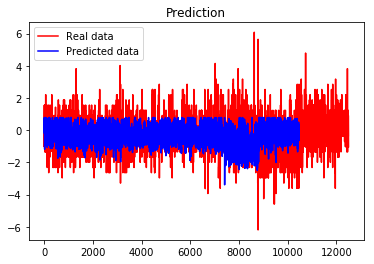

In [63]:
plt.plot(Q1_y, color = 'red', label = 'Real data')
plt.plot(Q1_train_pred_ann, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [190]:
print("MAE:" + str(mean_absolute_error(Q1_y, Q1_train_pred_ann)))
print("RMS: " + str(sqrt(mean_squared_error(Q1_y, Q1_train_pred_ann))))
print("MAPE: " + str(mean_absolute_percentage_error(Q1_y, Q1_train_pred_ann)))

MAE:0.5735550560501321
RMS: 0.7635229428746936
MAPE: 163.3335055318543


# MAE, RMS, MAPE for Testing dataset
MODEL : ANN

In [192]:
Q2_pred_test_ann = classifier.predict(Q2_x_f.values)

In [193]:
print("MAE:" + str(mean_absolute_error(Q2_y, Q2_pred_test_ann)))
print("RMS: " + str(sqrt(mean_squared_error(Q2_y, Q2_pred_test_ann))))
print("MAPE: " + str(mean_absolute_percentage_error(Q2_y, Q2_pred_test_ann)))

MAE:0.9980867680390102
RMS: 1.187389847759787
MAPE: 228.6646539318135


# TPOT:

In [30]:
# !pip3 install tpot --user --no-warn-script-location
import tpot
from tpot import TPOTRegressor

C:\Users\Girijesh\Anaconda3\lib\site-packages\deap\tools\_hypervolume\pyhv.py:33: ImportWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  "module. Expect this to be very slow.", ImportWarning)
C:\Users\Girijesh\Anaconda3\lib\importlib\_bootstrap.py:205: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [31]:
Q_2006, Q1_2006_x, Q1_2006_y = data_year(dfs_origin)

Enter the year :2006
Enter the quarter Q1 or Q2 or Q3 or Q4:Q1


In [35]:
tpot = TPOTRegressor(generations=2, population_size=50,
                     offspring_size=None,
                     mutation_rate=0.9,
                     verbosity=3,cv=2,n_jobs=-1)

In [ ]:
tpot.fit(Q1_2006_x[variables_select], Q1_2006_y)

28 operators have been imported by TPOT.


In [39]:
tpot.score(Q1_2006_x, Q1_2006_y)

-0.5063458247524208

In [40]:
tpot.export("tpot.py")

True

# Financial Crisis:

In [10]:
def rolling_interest(dataframe, variables_selected):

    response = int(input("Enter the no of Quarters: "))
    dict_Quarter = {1: "First Quarter: ", 2: "Second Quarter : " , 3: "Third Quarter: ", 4: "Fourth Quarter : ", 5: "Five Quarter :"}
    included = []
    target_inc = []
    i = 1
    print("-x-x-x-xEnter the Year and Quarters for training-x-x-x-x")
    while i<= response:
        x = data_year(dataframe)
#         if i == response:
#             print("**" + dict_Quarter[response] + "**")
        target_inc.append(x[2])
        included.append(x[1][variables_selected])
        i += 1
    concat_predictors = pd.concat(included, ignore_index= True)
    concat_target = pd.concat(target_inc, ignore_index= True)
    print("Shape of Predictors data" + str(concat_predictors.shape) )
    print("Shape of Target data" + str(concat_target.shape))        
        
    
    """Linear Regression Results"""
    print("******Enter the Year and Quarter to predict*****")
    Q, test_predictors, test_target  = data_year(dataframe)
    test_predictors = test_predictors[variables_selected]
#     test_target = data_year(dataframe)[2]
    lm = LinearRegression()
    lm.fit(concat_predictors, concat_target)
    Q_y_pred = lm.predict(test_predictors)
    MAE = mean_absolute_error(test_target, Q_y_pred)
    RMSE = sqrt(mean_squared_error(test_target, Q_y_pred))
    MAPE = mean_absolute_percentage_error(test_target, Q_y_pred)
    print("MAE_" + dict_Quarter[response + 1 ] + str(mean_absolute_error(test_target, Q_y_pred )))
    print("RMS_" + dict_Quarter[response + 1] + str(sqrt(mean_squared_error(test_target, Q_y_pred))))
    print("MAPE_" + dict_Quarter[response + 1] + str(mean_absolute_percentage_error(test_target, Q_y_pred)))

        
#    return MAE, RMSE, MAPE 



In [8]:
variables_select = ["CHANNEL_C", "PROPERTY TYPE_MH", "PROPERTY STATE_AR", "PROPERTY STATE_TX", "ORIGINAL LOAN-TO-VALUE (LTV)", 
                    "OCCUPANCY STATUS_P", "SELLER NAME_BANKOFAMERICA,NA", "PROPERTY STATE_NC",  "OCCUPANCY STATUS_I", 
                    "PROPERTY STATE_MN", "ORIGINAL UPB", "ORIGINAL LOAN TERM", "LOAN PURPOSE_P", "MORTGAGE INSURANCE PERCENTAGE",  
                    "PROPERTY STATE_AL", "FIRST TIME HOMEBUYER FLAG_N", "ORIGINAL COMBINED LOAN-TO-VALUE"]


In [9]:
#Q2 2007 prediction
rolling_interest(dfs_origin, variables_select)

Enter the no of Quarters: 1
-x-x-x-xEnter the Year and Quarters for training-x-x-x-x
Enter the year :2007
Enter the quarter Q1 or Q2 or Q3 or Q4:Q1
Shape of Predictors data(10430, 17)
Shape of Target data(10430, 1)
******Enter the Year and Quarter to predict*****
Enter the year :2007
Enter the quarter Q1 or Q2 or Q3 or Q4:Q2
MAE_Second Quarter : 0.8355250930802153
RMS_Second Quarter : 1.0509084245791418
MAPE_Second Quarter : 428.1242755102626


In [13]:
#Q3 2007 prediction
rolling_interest(dfs_origin, variables_select)

Enter the no of Quarters: 2
-x-x-x-xEnter the Year and Quarters for training-x-x-x-x
Enter the year :2007
Enter the quarter Q1 or Q2 or Q3 or Q4:Q1
Enter the year :2007
Enter the quarter Q1 or Q2 or Q3 or Q4:Q2
Shape of Predictors data(20683, 17)
Shape of Target data(20683, 1)
******Enter the Year and Quarter to predict*****
Enter the year :2007
Enter the quarter Q1 or Q2 or Q3 or Q4:Q3
MAE_Third Quarter: 0.739104074320791
RMS_Third Quarter: 0.9686426317508737
MAPE_Third Quarter: 358.4296851126502


In [14]:
# Q4 2007 prediction:
rolling_interest(dfs_origin, variables_select)

Enter the no of Quarters: 3
-x-x-x-xEnter the Year and Quarters for training-x-x-x-x
Enter the year :2007
Enter the quarter Q1 or Q2 or Q3 or Q4:Q1
Enter the year :2007
Enter the quarter Q1 or Q2 or Q3 or Q4:Q2
Enter the year :2007
Enter the quarter Q1 or Q2 or Q3 or Q4:Q3
Shape of Predictors data(30837, 17)
Shape of Target data(30837, 1)
******Enter the Year and Quarter to predict*****
Enter the year :2007
Enter the quarter Q1 or Q2 or Q3 or Q4:Q4
MAE_Fourth Quarter : 0.7415740637471814
RMS_Fourth Quarter : 0.9509107209737636
MAPE_Fourth Quarter : 322.7988535447491


In [15]:
#Q1 2008 prediction
rolling_interest(dfs_origin, variables_select)

Enter the no of Quarters: 4
-x-x-x-xEnter the Year and Quarters for training-x-x-x-x
Enter the year :2007
Enter the quarter Q1 or Q2 or Q3 or Q4:Q1
Enter the year :2007
Enter the quarter Q1 or Q2 or Q3 or Q4:Q2
Enter the year :2007
Enter the quarter Q1 or Q2 or Q3 or Q4:Q3
Enter the year :2007
Enter the quarter Q1 or Q2 or Q3 or Q4:Q4
Shape of Predictors data(33882, 17)
Shape of Target data(33882, 1)
******Enter the Year and Quarter to predict*****
Enter the year :2008
Enter the quarter Q1 or Q2 or Q3 or Q4:Q1
MAE_Five Quarter :0.6352448293685822
RMS_Five Quarter :0.793118963179716
MAPE_Five Quarter :120.81091150319378
